<div style="text-align: right">Data Analyst — Co-op/Internship</div> <br> <div style="text-align: right; color: green">
Zipline Data Scientist Take Home Project</div> 
<div style="text-align: right">Zhe Xu</div>

---

# Zipline Data Scientist Take Home Project


<center>
    <b>Zip Launch</b>
    <img src="image/zip_launch.png" width=500 />
</center>

---

## Project Description

In this Project, the dataset taken from the Zipline distribution center in Muhanga, where they serve rural hospitals in the western half of Rwanda, delivering blood transfusions used to treat conditions like malaria anemia and postpartum hemorrhaging. Ultimately, there will be communication about actionable insights, such as corrupted or missing data points, unexplained behaviors, individual outlier launches, diurnal weather patterns, poorly performing operations, etc. — to the engineering & operations team in the form of interpretable figures and tables with short descriptions of findings.

### The Project Content

In this root directory, there are:
- A provided `README.md` file giving background introduction about this project
- A `data` folder
    - A series of `flight_XXXXX.csv` files for each flight in the dataset. Each file contains the following signals from 5 seconds prior to launch, to 15 seconds after launch, logged at approximately 50Hz
    - A `summary_data.csv` summary data for all flights
- An `image` folder containing images included in the Jupyter Notebook
- This `Zipline_Flights_DataAnalysis.ipynb` Jupyter Notebook 

### Spliting the task into two parts to explore and analyze data in this project:

1. Inspect and explore the data of just one single flight
    * To familiarize with the dataset

    * To observe what the specific attributes do to a launch and flight of a zip


2. Combine data from all flights, with addition to reference of summary data
    * To observe trends, and to obtain overall insights for zip engineering & operations
    
---




## Table of Content

0. [Library Preparation](#python_library)


1. [Single Flight Analysis](#single_flight)

    1.1 [Acceleration](#single_acc)
    
    1.2 [Velocity](#single_vel)
    
    1.3 [Horizontal Displacement](#single_disp)
    
    1.4 [Estimated Standard Error](#single_SE)


2. [All Flights Analysis](#all_flights)

    2.1 [Read and Store All Flights Data](#read_flights_data)
    
    2.2 [Read and Manipulate Summary Data](#read_summary_data)
    
    2.3 [Analyze All Flights Launch](#flights_launch)
    
    2.4 [Analyze Flights data and Weather Factors](#flights_weather)
        
    - 2.4.1 [Some Missing Data and Outliers](#flights_outliers)
    
   2.5 [Manipulate Data and Build Parallel Coordinates Plot](#flights_para)
   
   
3. [Summary](#summary)


---


<a id = "python_library"></a>


## Python Libraries 

#### Import all libraries involved in this data analysis project

In [488]:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from scipy.optimize import fmin
sns.set_context('notebook')
import pymc3 as pm
from scipy import stats
from statsmodels.formula.api import ols
import glob
import re
from matplotlib import pyplot
from matplotlib import ticker

<a id = "single_flight"></a>




## Single Flight

#### Inspect data and try to observe trend of one single flight

Randomly pick a flight csv file, read and change the column names for better readability

In [110]:
df_flight_1 = pd.read_csv('data/flight_16951.csv', header = 0, names = ['sec_launch','pos_ref_north','pos_ref_east',
                                                              'pos_ref_down','vel_zip_north','vel_zip_east','vel_zip_down',
                                                             'acc_zip_foward','acc_zip_right','acc_zip_down', 'orientation_euler_roll',
                                                             'orientation_euler_pitch','orientation_euler_yaw','angular_zip_forward',
                                                             'angular_zip_right','angular_zip_down','pos_SE_north','pos_SE_east',
                                                                       'pos_SE_down'])



In [111]:
df_flight_1



,sec_launch,pos_ref_north,pos_ref_east,pos_ref_down,vel_zip_north,vel_zip_east,vel_zip_down,acc_zip_foward,acc_zip_right,acc_zip_down,orientation_euler_roll,orientation_euler_pitch,orientation_euler_yaw,angular_zip_forward,angular_zip_right,angular_zip_down,pos_SE_north,pos_SE_east,pos_SE_down
0,-4.99846,5.143372,8.170100,-4.561916,0.000000,0.000000,0.000000,2.200169,-0.059350,-9.497843,0.007623,0.214396,2.741056,0.002011,-0.000639,0.000495,0.186535,0.340824,0.428683
1,-4.97846,5.143372,8.170100,-4.561916,0.000000,0.000000,0.000000,2.027999,-0.053380,-9.611131,0.007616,0.214414,2.741054,0.004984,-0.000766,0.001946,0.186535,0.340824,0.428683
2,-4.95833,5.143372,8.170100,-4.561916,0.000000,0.000000,0.000000,2.051773,-0.264372,-9.632382,0.007602,0.214424,2.741051,0.000886,0.002613,-0.000127,0.186535,0.340824,0.428683
3,-4.93848,5.143549,8.168812,-4.561501,0.000000,0.000000,0.000000,2.173164,-0.113283,-9.657514,0.007609,0.214409,2.741053,-0.001839,-0.001339,-0.000740,0.186556,0.340836,0.428738
4,-4.91848,5.143549,8.168812,-4.561501,0.000000,0.000000,0.000000,2.012778,-0.045159,-9.635982,0.007615,0.214412,2.741054,0.000497,-0.000715,0.001186,0.186556,0.340836,0.428738
5,-4.89849,5.143012,8.170419,-4.563326,0.000000,0.000000,0.000000,2.077366,-0.070073,-9.526079,0.007610,0.214417,2.741053,0.000475,0.001337,0.000074,0.186575,0.340849,0.428794
6,-4.87850,5.143012,8.170419,-4.563326,0.000000,0.000000,0.000000,2.168130,-0.001093,-9.594013,0.007615,0.214402,2.741054,0.000139,-0.002073,-0.000767,0.186575,0.340849,0.428794
7,-4.85848,5.143012,8.170419,-4.563326,0.000000,0.000000,0.000000,1.938173,-0.068898,-9.672871,0.007622,0.214410,2.741055,0.001792,0.000848,0.000303,0.186575,0.340849,0.428794
8,-4.83851,5.143236,8.170900,-4.565207,0.000000,0.000000,0.000000,2.158677,-0.156225,-9.559793,0.007614,0.214424,2.741054,-0.001104,0.002537,-0.001246,0.186595,0.340861,0.428849
9,-4.81852,5.143236,8.170900,-4.565207,0.000000,0.000000,0.000000,2.115438,-0.032763,-9.527992,0.007606,0.214389,2.741052,-0.000456,-0.002244,0.002054,0.186595,0.340861,0.428849


#### Check if there is any missing value in the dataframe of this flight, in which there is none

In [368]:
df_flight_1.isnull().values.any()

False

In [112]:
df_flight_1_adj = df_flight_1.rename(columns={"vel_zip_down": "vel_zip_up"})
df_flight_1_adj['vel_zip_up'] = df_flight_1_adj['vel_zip_up'].apply(lambda x: x*-1)

In [38]:
df_flight_1_adj


,sec_launch,pos_ref_north,pos_ref_east,pos_ref_down,vel_zip_north,vel_zip_east,vel_zip_up,acc_zip_foward,acc_zip_right,acc_zip_down,orientation_euler_roll,orientation_euler_pitch,orientation_euler_yaw,angular_zip_forward,angular_zip_right,angular_zip_down,pos_SE_north,pos_SE_east,pos_SE_down
0,-4.99846,5.143372,8.170100,-4.561916,0.000000,0.000000,-0.000000,2.200169,-0.059350,-9.497843,0.007623,0.214396,2.741056,0.002011,-0.000639,0.000495,0.186535,0.340824,0.428683
1,-4.97846,5.143372,8.170100,-4.561916,0.000000,0.000000,-0.000000,2.027999,-0.053380,-9.611131,0.007616,0.214414,2.741054,0.004984,-0.000766,0.001946,0.186535,0.340824,0.428683
2,-4.95833,5.143372,8.170100,-4.561916,0.000000,0.000000,-0.000000,2.051773,-0.264372,-9.632382,0.007602,0.214424,2.741051,0.000886,0.002613,-0.000127,0.186535,0.340824,0.428683
3,-4.93848,5.143549,8.168812,-4.561501,0.000000,0.000000,-0.000000,2.173164,-0.113283,-9.657514,0.007609,0.214409,2.741053,-0.001839,-0.001339,-0.000740,0.186556,0.340836,0.428738
4,-4.91848,5.143549,8.168812,-4.561501,0.000000,0.000000,-0.000000,2.012778,-0.045159,-9.635982,0.007615,0.214412,2.741054,0.000497,-0.000715,0.001186,0.186556,0.340836,0.428738
5,-4.89849,5.143012,8.170419,-4.563326,0.000000,0.000000,-0.000000,2.077366,-0.070073,-9.526079,0.007610,0.214417,2.741053,0.000475,0.001337,0.000074,0.186575,0.340849,0.428794
6,-4.87850,5.143012,8.170419,-4.563326,0.000000,0.000000,-0.000000,2.168130,-0.001093,-9.594013,0.007615,0.214402,2.741054,0.000139,-0.002073,-0.000767,0.186575,0.340849,0.428794
7,-4.85848,5.143012,8.170419,-4.563326,0.000000,0.000000,-0.000000,1.938173,-0.068898,-9.672871,0.007622,0.214410,2.741055,0.001792,0.000848,0.000303,0.186575,0.340849,0.428794
8,-4.83851,5.143236,8.170900,-4.565207,0.000000,0.000000,-0.000000,2.158677,-0.156225,-9.559793,0.007614,0.214424,2.741054,-0.001104,0.002537,-0.001246,0.186595,0.340861,0.428849
9,-4.81852,5.143236,8.170900,-4.565207,0.000000,0.000000,-0.000000,2.115438,-0.032763,-9.527992,0.007606,0.214389,2.741052,-0.000456,-0.002244,0.002054,0.186595,0.340861,0.428849



<a id = "single_acc"></a>

### Acceleration


Resultant acceleration is calculated by 
\begin{equation*}
ResultantVelocity = \sqrt{AccZipForward^2+AccZipRight^2+AccZipDown^2}
\end{equation*}


By observation, there are a few points worth noticing:

* Even though it is normal to have non-zero acceleration prior to the launch due to light wobbling when the zip is set on the rail, the accelleration, for instance, value of acceleration of the zip in down direction should not be as large as 9 or 10

* Inspect the acceleration of the zip at launch (sec_launch = 0) and the associated index, and then inspect `sec_launch` and `resultant_acc`

* Therefore, it is logical to assume that there is <b>a mistake of missing calibration for the monitor before launch, and we can approximately treat `10` (m/s^2) as 0 acceleration of zip in down direction</b>

* There is a moment of thrust where there are some significant values of resultant acceleration indicating the moment of launch for the zip, which is not exactly at `sec_launch` of 0 sec. And the zip approximagtely cruised with a steady velocity and resultant acceleration fluctuated around 0 m/s^2

In [130]:
df_flight_1_adj['resultant_acc'] = np.sqrt(np.square(df_flight_1[['acc_zip_foward','acc_zip_right','acc_zip_down']]).sum(axis=1))


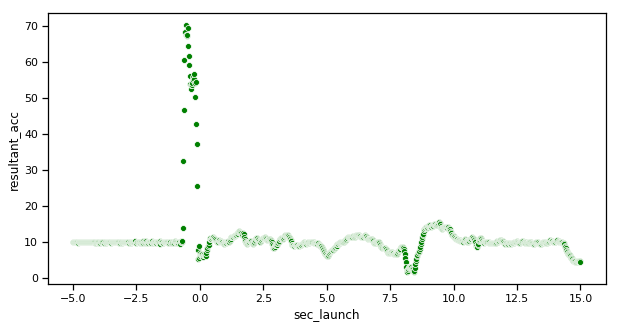

In [166]:
plt.figure(figsize=(10,5))
ax_acc = sns.scatterplot(x='sec_launch', y='resultant_acc', data = df_flight_1_adj, color="g")

In [132]:
df_flight_1_adj.loc[df_flight_1_adj['sec_launch'] == 0, ['sec_launch','resultant_acc']]

,sec_launch,resultant_acc
250,0.0,6.754045


#### Observe the fluctuation of the zip prior to and soonly after the launch

* It seems like the acceleration for launching took place at around 0.7 second prior to the real "launch"
* Meaning that there might be a delay between timer and speed monitor, and we can treat the timestamp `sec_launch` -0.69977 is the official launch time 

In [133]:
df_flight_1_adj[['sec_launch','resultant_acc']].iloc[200:265]

,sec_launch,resultant_acc
200,-0.99968,10.046618
201,-0.97968,9.770291
202,-0.95969,9.680696
203,-0.93970,9.992353
204,-0.91970,9.624160
205,-0.89971,9.810131
206,-0.87972,9.822897
207,-0.85972,9.680094
208,-0.83973,9.912532
209,-0.81970,10.015523



<a id = "single_vel"></a>

### Velocity


Resultant velocity is calculated by 
\begin{equation*}
ResultantVelocity = \sqrt{VelZipNorth^2+VelZipEast^2+VelZipDown^2}
\end{equation*}

And also for better reference, it is converted to unit `km/hr`

In [134]:
df_flight_1_adj['resultant_vel'] = 3.6* np.sqrt(np.square(df_flight_1[['vel_zip_north','vel_zip_east','vel_zip_down']]).sum(axis=1))


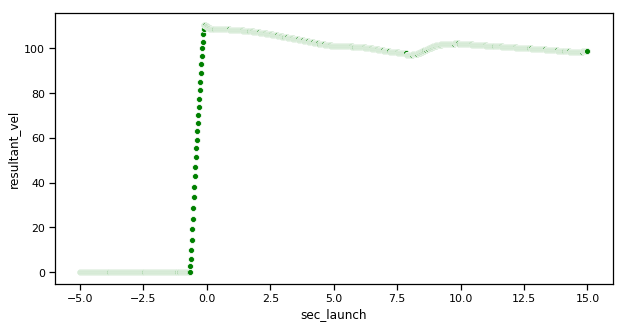

In [165]:
plt.figure(figsize=(10,5))
ax_vel = sns.scatterplot(x='sec_launch', y='resultant_vel', data = df_flight_1_adj, color="g")

According to the following two dataframes, we can narrow down the "real launch" time to be <b>-0.67978 second</b>

In [137]:
df_flight_1_adj[['sec_launch','resultant_vel']].iloc[215:218]

,sec_launch,resultant_vel
215,-0.69977,0.000000
216,-0.67978,0.000000
217,-0.65979,2.502453


In [138]:
df_flight_1_adj[['sec_launch','resultant_vel']].iloc[230:270]

,sec_launch,resultant_vel
230,-0.39987,59.217874
231,-0.37988,62.872459
232,-0.35988,66.438021
233,-0.33989,70.093579
234,-0.31990,73.789273
235,-0.29990,77.512040
236,-0.27914,81.464430
237,-0.25991,85.112635
238,-0.23992,88.926286
239,-0.21993,92.833166


#### Notice: it took the zip around `0.6` sec to accelerate to approximately `110.5` km/hr, which is its max velocity within 15 seconds after launch

In [139]:
df_flight_1_adj['resultant_vel'].max()

110.51021079115304

In [140]:
df_flight_1_adj.loc[df_flight_1_adj['resultant_vel'] == df_flight_1_adj['resultant_vel'].max(), 'sec_launch'].values[0] - (df_flight_1_adj.loc[df_flight_1_adj['resultant_vel'] == 0].tail(1)['sec_launch'].values[0])


sec_max_vel

0.5998098786163001

<b>After a bit of manipulation, we can see that it took roughly `0.5` sec to reach resultant velocity of `100` km/hr</b>

In [293]:
time_to_100 = df_flight_1_adj.loc[round(df_flight_1_adj['resultant_vel'],1) == 100, 'sec_launch'].head(1).values[0]

time_to_100

-0.179939985275

In [295]:
sec_100_vel = time_to_100 - (df_flight_1_adj.loc[df_flight_1_adj['resultant_vel'] == 0].tail(1)['sec_launch'].values[0])
sec_100_vel

0.49984002113400006


<a id = "single_disp"></a>

### Horizontal displacement 


Horizontal displacement <b>with regards to reference point</b> is calculated by 
\begin{equation*}
HorizontalDisplacement   = \sqrt{PosRefNorth^2+PosRefEast^2}
\end{equation*}

We can see that after the zip was launched, it cruised with the relatively steady velocity with accelation is approximately equal to 0 (if monitor is properly calibrated prior to launch)

In [141]:
df_flight_1_adj['horizontal_displacement'] = np.sqrt(np.square(df_flight_1[['pos_ref_north','pos_ref_east']]).sum(axis=1))


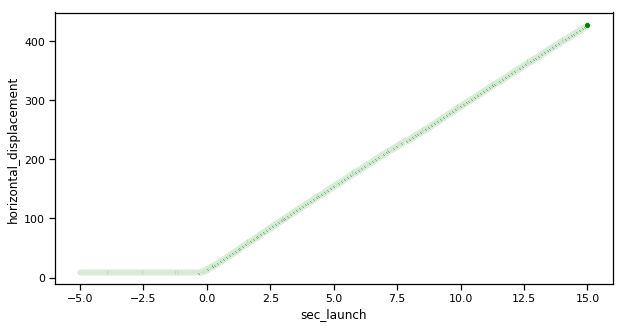

In [163]:
plt.figure(figsize=(10,5))
ax_pos = sns.scatterplot(x='sec_launch', y='horizontal_displacement', data = df_flight_1_adj, color="g")


<a id = "single_SE"></a>

### Positional uncertainty in the north, east and down direction (Estimated Standard Error)


* Based on the graph for standard error of position in north, east and down direction, we can see that the position of the zip prior to the launch and early after the launch is quite uncertain given the graduately increased Standard Error.


* Based on the inspection below, we can see that after around 7.89757 second, the Standard Error greatly decreased to normal (very low level), meaning the position data of the zip spread less, and it is less uncertain


* I believe that is because there was less fluctuation for the zip a while after it was launched, and the monitor and tracker for the zip got calibrated so that it was able to log position data more accurately

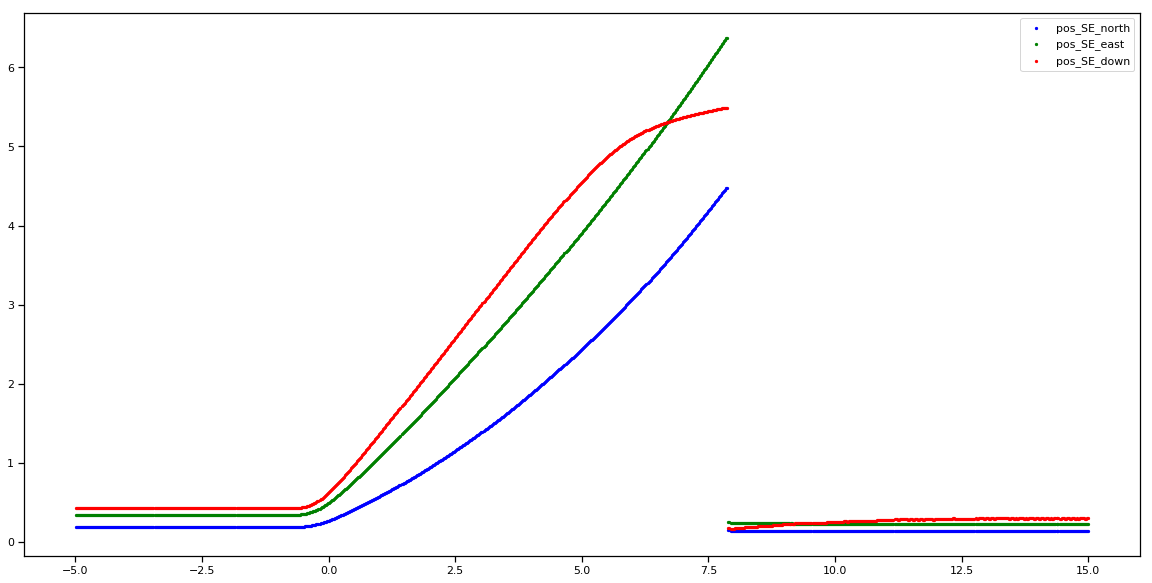

In [164]:

fig = plt.figure(figsize=(20,10))
ax_SE = fig.add_subplot(111)

ax_SE.scatter(df_flight_1_adj['sec_launch'], df_flight_1_adj['pos_SE_north'], s=5, c='b', label='pos_SE_north')
ax_SE.scatter(df_flight_1_adj['sec_launch'], df_flight_1_adj['pos_SE_east'], s=5, c='g', label='pos_SE_east')
ax_SE.scatter(df_flight_1_adj['sec_launch'], df_flight_1_adj['pos_SE_down'], s=5, c='r', label='pos_SE_down')
plt.legend(loc='upper right');
plt.show()

#### Based on graph above, we can check the exact time (7.89757 sec) when standard error dropped to a much lower level (0.147248) 


In [172]:
df_flight_1_adj.loc[(7.5 < df_flight_1_adj['sec_launch']) & (df_flight_1_adj['sec_launch'] < 8), ['sec_launch', 'pos_SE_north']]


,sec_launch,pos_SE_north
626,7.51770,4.194758
627,7.53769,4.210838
628,7.55768,4.226947
629,7.57768,4.243093
630,7.59767,4.259260
631,7.61766,4.275465
632,7.63767,4.291698
633,7.65765,4.307944
634,7.67764,4.324235
635,7.69764,4.340547


---


<a id = "all_flights"></a>

## All Flights

#### Read and combine data for all flights, and manipulate data for exploration and analysis

* Use `glob` library to load all csv file

* Use regular expression `re` library to obtain the flight index

In [244]:
all_filenames = [i for i in glob.glob('data/flight*.{}'.format('csv'))]
# print(all_filenames)

In [245]:
flight_index = []
for f in all_filenames:
    flight_index.append(re.findall('_(.*)\.csv',f)[0])


<a id = "read_flights_data"></a>

### Read data from all dataframe into separate dataframes and store them in a hash map of flight dataframes

#### Edit the columns names of dataframes for all flights for better readability and store data from all csv file as dataframes into a dictionary with the flight index as the key for convenience

And iterate the hash map of all flights dataframe to check if there is any missing data. Since there is no message indicating missing value in any specific flight dataframe, so there is no missing data in data of all flights

In [298]:
df_all_flights = {}
for i in range(len(all_filenames)):
    oname = flight_index[i]
    df = pd.read_csv(all_filenames[i], header = 0, names = ['sec_launch','pos_ref_north','pos_ref_east',
                                                              'pos_ref_down','vel_zip_north','vel_zip_east','vel_zip_down',
                                                             'acc_zip_foward','acc_zip_right','acc_zip_down', 'orientation_euler_roll',
                                                             'orientation_euler_pitch','orientation_euler_yaw','angular_zip_forward',
                                                             'angular_zip_right','angular_zip_down','pos_SE_north','pos_SE_east',
                                                                       'pos_SE_down'])
    df_all_flights[oname] = df


In [371]:
for key in df_all_flights:
    if df_all_flights[key].isnull().values.any():
        print('There is missing value in flight index: ', key)


<a id = "read_summary_data"></a>

### Read and manipulate summary data for the zips in all flights

After the summary data is read, perform similar operations as above and add relative data to the summary dataframe for later analysis

In [470]:
df_summary = pd.read_csv('data/summary_data.csv')

#### Check the summary dataframe for missing data and the name of the associated column

There exists missing values in column `preflight_voltage`, manipulate the dataframe to avoid missing values

In [471]:
df_summary.isnull().values.any()

True

In [472]:
df_summary.columns[df_summary.isnull().any()]

Index(['preflight_voltage'], dtype='object')

In [473]:
df_summary[df_summary.columns[df_summary.isnull().any()][0]].fillna(0, inplace=True)

In [474]:
df_summary

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59 CAT,0.000000,74.150000,80662.081736,-49.434555,1.949338,15SPJJJ11024054
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49 CAT,0.000000,71.175044,80708.065314,-4.408768,0.917357,15SPJJJ09011032
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37 CAT,0.000000,66.374982,80774.270438,-23.458781,3.788383,15SPJJJ09011032
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04 CAT,0.000000,59.000000,80805.138793,-46.747881,3.921605,15SPJJJ11049056
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39 CAT,0.000000,63.900000,80768.969307,-29.293360,2.975881,15SPJJJ09031032
5,16959,28.574951,15SPJJJ09018015,577350132840857611,5c504d9a16,33.258007,30.178811,2018-09-06 11:31:07 CAT,0.000000,65.074951,80621.201026,-68.360838,2.750346,15SPJJJ11024054
6,16960,27.550000,15SPJJJ09017016,577209618523082792,5c504d9a16,33.937340,30.063187,2018-09-06 12:55:23 CAT,0.000000,61.250000,80599.898970,-27.822443,1.556340,15SPJJJ09031032
7,16961,28.250000,15SPJJJ10023027,577350132807348254,5c504d9a16,33.598980,29.969515,2018-09-06 13:09:51 CAT,0.000000,53.500000,80552.491259,7.094333,2.378607,15SPJJJ11049056
8,16962,28.600000,15SPJJJ10052026,577350132840857611,5c504d9a16,31.639851,30.263741,2018-09-06 13:43:05 CAT,0.000000,60.374982,80445.017877,-46.053006,1.161924,15SPJJJ09011032
9,16965,32.250000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.744957,30.354775,2018-09-06 14:56:25 CAT,0.000000,49.600000,80379.646583,-17.594640,2.742027,15SPJJJ11049056


### Adjust the summary dataframe

* Make a copy of summary dataframe for later analysis

* Iterate the hash map of dataframe for all flights, then manipulate each dataframe and obtain the feature data for each flight, and finally add them to the summary dataframe:
    - `sec_100_vel`, the second Zips spent to reach 100 km/hr speed
    - `flight_altitude`, the flight altitude Zips climbed in 15 seconds after they were launched
    - `ave_stable_posSE`, the average estimated standard error indicating positinoal uncertainty of the Zips
    - `data_size`, the size of data for each flights

In [475]:
df_summary_adj = df_summary.copy()

In [476]:
sec_100_vel = []
flight_altitude = []
ave_stable_posSE= []
data_size = []

for key in df_all_flights:
    stable_i = 0
    df_all_flights[key]['resultant_vel'] = 3.6* np.sqrt(np.square(df_flight_1[['vel_zip_north','vel_zip_east','vel_zip_down']]).sum(axis=1))
    time_to_100 = df_all_flights[key].loc[round(df_all_flights[key]['resultant_vel'],1) == 100, 'sec_launch'].head(1).values[0]
    sec_100_vel.append(time_to_100 - (df_all_flights[key].loc[df_all_flights[key]['resultant_vel'] == 0].tail(1)['sec_launch'].values[0]))
    flight_altitude.append(abs(df_all_flights[key]['pos_ref_down'].tail(1).values[0] - df_all_flights[key]['pos_ref_down'].head(1).values[0]))
    for i in df_all_flights[key].index.values:
        if (df_all_flights[key]['pos_SE_east'][i] - df_all_flights[key]['pos_SE_east'][i+1] > 2):
            stable_i = i + 1
            break
    sum_SE = df_all_flights[key]['pos_SE_east'][stable_i:].sum()+df_all_flights[key]['pos_SE_north'][stable_i:].sum()+df_all_flights[key]['pos_SE_down'][stable_i:].sum()
    ave_stable_posSE.append(sum_SE/((df_all_flights[key].shape[0]-stable_i)*3))
    data_size.append(df_all_flights[key].shape[0])
df_summary_adj['sec_100_vel'] = sec_100_vel
df_summary_adj['flight_altitude'] = flight_altitude
df_summary_adj['ave_stable_posSE'] = ave_stable_posSE
df_summary_adj['data_size'] = data_size


#### Observe flights data in adjusted summary dataframe

* Notice something interesting about the estimated standard error behavior among zips in all flights

In [477]:
df_summary_adj

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number,sec_100_vel,flight_altitude,ave_stable_posSE,data_size
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59 CAT,0.000000,74.150000,80662.081736,-49.434555,1.949338,15SPJJJ11024054,0.49984,73.583416,0.642203,1001
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49 CAT,0.000000,71.175044,80708.065314,-4.408768,0.917357,15SPJJJ09011032,0.49981,74.781635,0.631236,1001
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37 CAT,0.000000,66.374982,80774.270438,-23.458781,3.788383,15SPJJJ09011032,0.49984,73.317892,0.428894,1001
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04 CAT,0.000000,59.000000,80805.138793,-46.747881,3.921605,15SPJJJ11049056,0.49984,71.149138,0.828855,999
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39 CAT,0.000000,63.900000,80768.969307,-29.293360,2.975881,15SPJJJ09031032,0.49986,72.592707,0.021564,1001
5,16959,28.574951,15SPJJJ09018015,577350132840857611,5c504d9a16,33.258007,30.178811,2018-09-06 11:31:07 CAT,0.000000,65.074951,80621.201026,-68.360838,2.750346,15SPJJJ11024054,0.49987,72.050814,0.800692,1001
6,16960,27.550000,15SPJJJ09017016,577209618523082792,5c504d9a16,33.937340,30.063187,2018-09-06 12:55:23 CAT,0.000000,61.250000,80599.898970,-27.822443,1.556340,15SPJJJ09031032,0.49984,72.769355,0.067870,1001
7,16961,28.250000,15SPJJJ10023027,577350132807348254,5c504d9a16,33.598980,29.969515,2018-09-06 13:09:51 CAT,0.000000,53.500000,80552.491259,7.094333,2.378607,15SPJJJ11049056,0.49899,66.743170,0.494138,1001
8,16962,28.600000,15SPJJJ10052026,577350132840857611,5c504d9a16,31.639851,30.263741,2018-09-06 13:43:05 CAT,0.000000,60.374982,80445.017877,-46.053006,1.161924,15SPJJJ09011032,0.49984,72.023445,0.996911,999
9,16965,32.250000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.744957,30.354775,2018-09-06 14:56:25 CAT,0.000000,49.600000,80379.646583,-17.594640,2.742027,15SPJJJ11049056,0.49878,72.433961,0.631561,1001


#### As we can see, the position uncertainty is comparatively quite low and very stable a while after launch in some of the flights, such as the one below `17736`

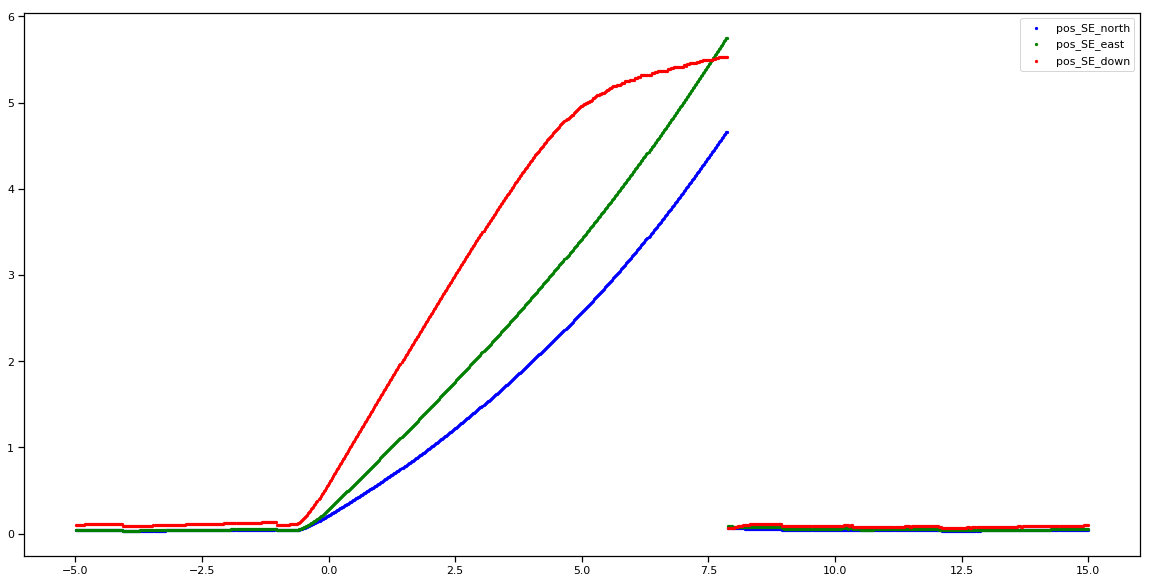

In [465]:
fig = plt.figure(figsize=(20,10))
ax_SE = fig.add_subplot(111)

ax_SE.scatter(df_all_flights['17736']['sec_launch'], df_all_flights['17736']['pos_SE_north'], s=5, c='b', label='pos_SE_north')
ax_SE.scatter(df_all_flights['17736']['sec_launch'], df_all_flights['17736']['pos_SE_east'], s=5, c='g', label='pos_SE_east')
ax_SE.scatter(df_all_flights['17736']['sec_launch'], df_all_flights['17736']['pos_SE_down'], s=5, c='r', label='pos_SE_down')
plt.legend(loc='upper right');
plt.show()


<a id = "flights_launch"></a>

### Launch

#### One thing noticed from the summary data, the `launch_airspeed` is greater than `launch_groundspeed`, and based on equation in this link from NASA: [Relative Velocity](https://www.grc.nasa.gov/www/k-12/airplane/move2.html),
\begin{equation*}
WindSpeed = AirSpeed - GroundSpeed
\end{equation*}
<center>
<img src="image/NASA_Air_Ground.png" width=500 />
</center>

#### Discussion

And according to the scatter plot and histogram/count plot which categorize the relationship between `launch_airspeed` and 
`launch_groundspeed`, there are following key points:

* According to the material from NASA and the data itself, we can see that the referenced point fixed for the measurement in this project is the aircraft(the zip).


* There are 79 flights when the zips were launched somewhat against the wind (`V_ground < V_air`), and 368 flights where the zip benefited from the wind after launch

    - Because based on the equation and image above, the positive velocity is defined to be toward the tail of the zip, so the wind was in positive direction as the positive velocity direction, hence the wind direction was `against` the movement direction of the zip if we have `launch_airspeed` > `launch_groundspeed`. And it was `along` otherwise.


* In majority of the flights, the zips were launched along the direction of the wind (Not exactly the same as wind direction/angle though, but it can be calculated using Trigonometry)

In [478]:
df_summary_adj

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number,sec_100_vel,flight_altitude,ave_stable_posSE,data_size
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59 CAT,0.000000,74.150000,80662.081736,-49.434555,1.949338,15SPJJJ11024054,0.49984,73.583416,0.642203,1001
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49 CAT,0.000000,71.175044,80708.065314,-4.408768,0.917357,15SPJJJ09011032,0.49981,74.781635,0.631236,1001
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37 CAT,0.000000,66.374982,80774.270438,-23.458781,3.788383,15SPJJJ09011032,0.49984,73.317892,0.428894,1001
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04 CAT,0.000000,59.000000,80805.138793,-46.747881,3.921605,15SPJJJ11049056,0.49984,71.149138,0.828855,999
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39 CAT,0.000000,63.900000,80768.969307,-29.293360,2.975881,15SPJJJ09031032,0.49986,72.592707,0.021564,1001
5,16959,28.574951,15SPJJJ09018015,577350132840857611,5c504d9a16,33.258007,30.178811,2018-09-06 11:31:07 CAT,0.000000,65.074951,80621.201026,-68.360838,2.750346,15SPJJJ11024054,0.49987,72.050814,0.800692,1001
6,16960,27.550000,15SPJJJ09017016,577209618523082792,5c504d9a16,33.937340,30.063187,2018-09-06 12:55:23 CAT,0.000000,61.250000,80599.898970,-27.822443,1.556340,15SPJJJ09031032,0.49984,72.769355,0.067870,1001
7,16961,28.250000,15SPJJJ10023027,577350132807348254,5c504d9a16,33.598980,29.969515,2018-09-06 13:09:51 CAT,0.000000,53.500000,80552.491259,7.094333,2.378607,15SPJJJ11049056,0.49899,66.743170,0.494138,1001
8,16962,28.600000,15SPJJJ10052026,577350132840857611,5c504d9a16,31.639851,30.263741,2018-09-06 13:43:05 CAT,0.000000,60.374982,80445.017877,-46.053006,1.161924,15SPJJJ09011032,0.49984,72.023445,0.996911,999
9,16965,32.250000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.744957,30.354775,2018-09-06 14:56:25 CAT,0.000000,49.600000,80379.646583,-17.594640,2.742027,15SPJJJ11049056,0.49878,72.433961,0.631561,1001


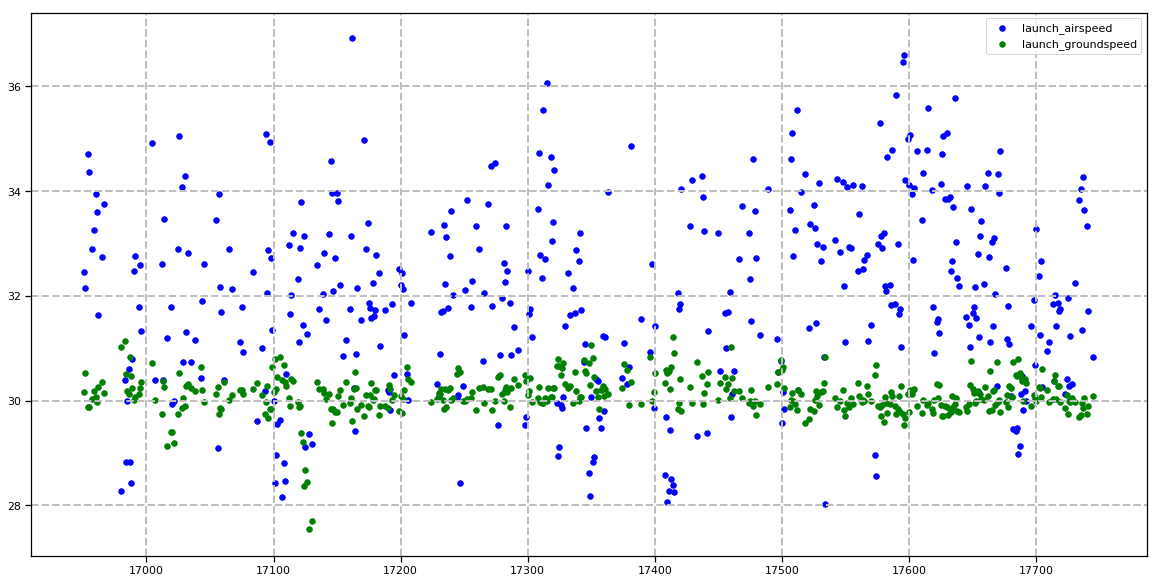

In [479]:
fig = plt.figure(figsize=(20,10))
ax_speed = fig.add_subplot(111)

ax_speed.scatter(df_summary_adj['flight_id'], df_summary_adj['launch_airspeed'], s=30, c='b',label='launch_airspeed')
ax_speed.scatter(df_summary_adj['flight_id'], df_summary_adj['launch_groundspeed'], s=30, c='g', label='launch_groundspeed')
plt.legend(loc='upper right');
plt.grid(True, lw = 2, ls = '--', c = '.75')
plt.show()

Use `.loc` method to apply condition and then categorize launch speed data into two to inspect if the zip were launched against the wind or not

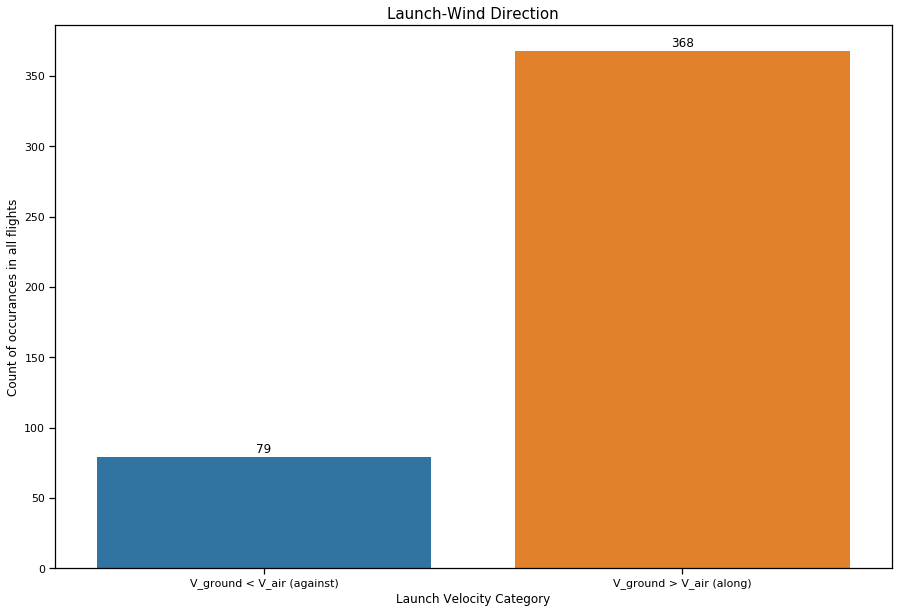

In [561]:

df_summary_2 = df_summary_adj.copy()
df_summary_2.loc[df_summary_2['launch_airspeed'] > df_summary_2['launch_groundspeed']] = 'V_ground > V_air (along)'
df_summary_2.loc[df_summary_2['launch_airspeed'] < df_summary_2['launch_groundspeed']] = 'V_ground < V_air (against)'
df_summary_adj.loc[df_summary_adj['launch_airspeed'] > df_summary_adj['launch_groundspeed'], 'flight_cat'] = 'V_ground > V_air (along)'
df_summary_adj.loc[df_summary_adj['launch_airspeed'] < df_summary_adj['launch_groundspeed'], 'flight_cat'] = 'V_ground < V_air (against)'

plt.figure(figsize=(15,10))
ax_launch_dir = sns.countplot(df_summary_2['launch_airspeed'].astype('str').sort_values())
plt.title("Launch-Wind Direction",fontsize=15)
ax_launch_dir.set_xlabel("Launch Velocity Category")
ax_launch_dir.set_ylabel("Count of occurances in all flights")
for p in ax_launch_dir.patches:
    height = p.get_height()
    ax_launch_dir.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1}'.format(height),
            ha="center")

plt.show()



Inspect the adjusted summary dataframe after we categorized all the flights

In [563]:
df_summary_adj

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number,sec_100_vel,flight_altitude,ave_stable_posSE,data_size,flight_cat
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59 CAT,0.000000,74.150000,80662.081736,-49.434555,1.949338,15SPJJJ11024054,0.49984,73.583416,0.642203,1001,V_ground > V_air (along)
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49 CAT,0.000000,71.175044,80708.065314,-4.408768,0.917357,15SPJJJ09011032,0.49981,74.781635,0.631236,1001,V_ground > V_air (along)
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37 CAT,0.000000,66.374982,80774.270438,-23.458781,3.788383,15SPJJJ09011032,0.49984,73.317892,0.428894,1001,V_ground > V_air (along)
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04 CAT,0.000000,59.000000,80805.138793,-46.747881,3.921605,15SPJJJ11049056,0.49984,71.149138,0.828855,999,V_ground > V_air (along)
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39 CAT,0.000000,63.900000,80768.969307,-29.293360,2.975881,15SPJJJ09031032,0.49986,72.592707,0.021564,1001,V_ground > V_air (along)
5,16959,28.574951,15SPJJJ09018015,577350132840857611,5c504d9a16,33.258007,30.178811,2018-09-06 11:31:07 CAT,0.000000,65.074951,80621.201026,-68.360838,2.750346,15SPJJJ11024054,0.49987,72.050814,0.800692,1001,V_ground > V_air (along)
6,16960,27.550000,15SPJJJ09017016,577209618523082792,5c504d9a16,33.937340,30.063187,2018-09-06 12:55:23 CAT,0.000000,61.250000,80599.898970,-27.822443,1.556340,15SPJJJ09031032,0.49984,72.769355,0.067870,1001,V_ground > V_air (along)
7,16961,28.250000,15SPJJJ10023027,577350132807348254,5c504d9a16,33.598980,29.969515,2018-09-06 13:09:51 CAT,0.000000,53.500000,80552.491259,7.094333,2.378607,15SPJJJ11049056,0.49899,66.743170,0.494138,1001,V_ground > V_air (along)
8,16962,28.600000,15SPJJJ10052026,577350132840857611,5c504d9a16,31.639851,30.263741,2018-09-06 13:43:05 CAT,0.000000,60.374982,80445.017877,-46.053006,1.161924,15SPJJJ09011032,0.49984,72.023445,0.996911,999,V_ground > V_air (along)
9,16965,32.250000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.744957,30.354775,2018-09-06 14:56:25 CAT,0.000000,49.600000,80379.646583,-17.594640,2.742027,15SPJJJ11049056,0.49878,72.433961,0.631561,1001,V_ground > V_air (along)



<a id = "flights_weather"></a>

### Weather

Analyze Zips data such as `launch_airspeed` and `launch_groundspeed` in all flights dataframe, considering the weather factors: `wind`, `flight_altitude`, `air_temperature`, `static_pressure`, and `rel_humidity`

By instinct, if we want to konw the relationships among attributes, we would first consider using `.corr()` method and `heatmap` from seaborn to graphically inspect the attribute correlation 

However, given many reasons involved such as less amount of data and less-differentiated weather factors, the correlation among attributes can not be easily obtained

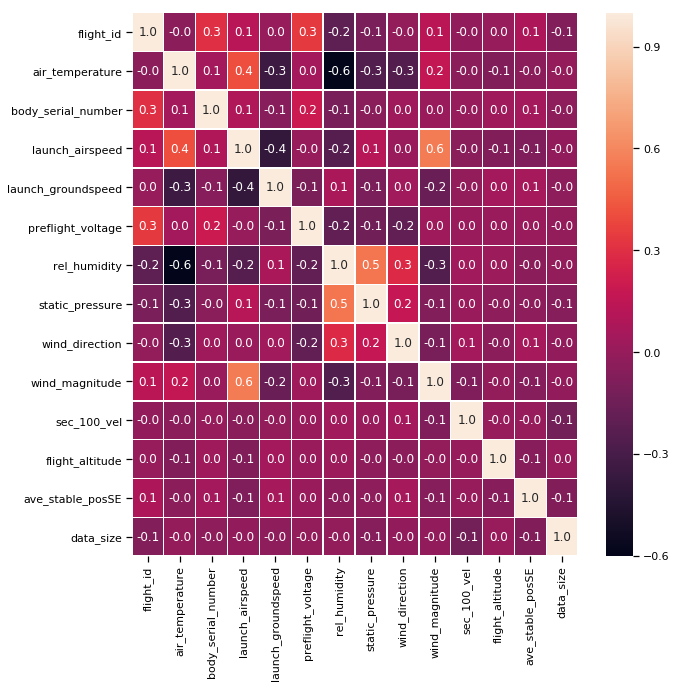

In [532]:

f,ax_corr = plt.subplots(figsize=(10, 10))
sns.heatmap(df_summary_adj.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax_corr)
plt.show()

<a id = "flights_outliers"></a>

### Some Outliers

#### Use boxplot and scatterplot to visualize `flight_altitude` data and find possible outliers

We can notice that there exist some flights as outliers in terms of `flight_altitude` in 15 seconds after launch

{'whiskers': [<matplotlib.lines.Line2D at 0x12d334550>,
 'caps': [<matplotlib.lines.Line2D at 0x12d334be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d334160>],
 'medians': [<matplotlib.lines.Line2D at 0x12d32b2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12d32b5f8>],
 'means': []}

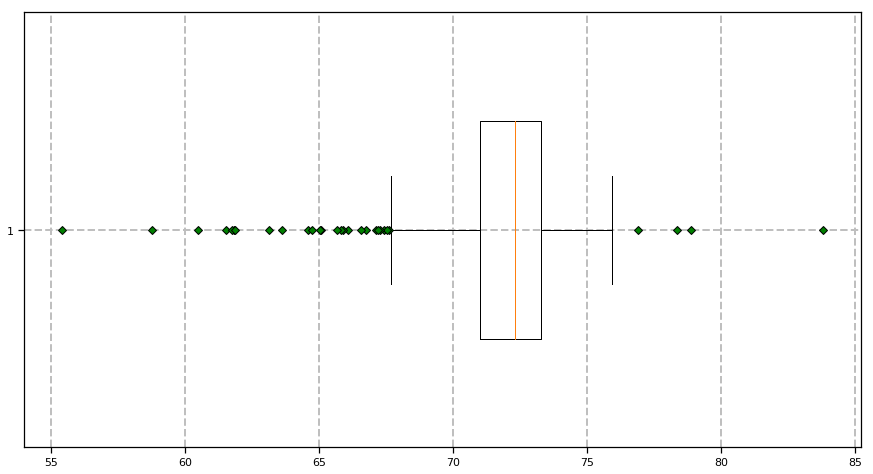

In [533]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,8))
plt.grid(True, lw = 2, ls = '--', c = '.75')
ax1.boxplot(df_summary_adj['flight_altitude'],flierprops=green_diamond,vert=False, widths=0.5)

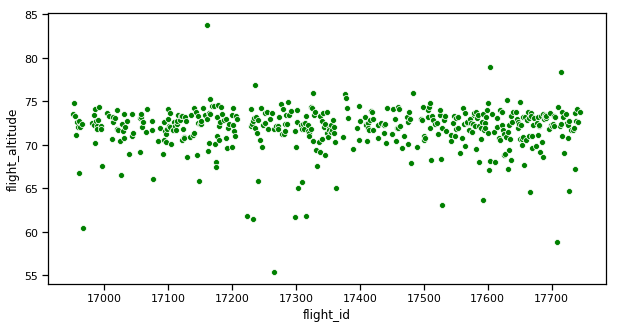

In [534]:
plt.figure(figsize=(10,5))
ax_fa = sns.scatterplot(x='flight_id', y='flight_altitude', data = df_summary_adj, color="g")

#### Write a function to find the array of outliers, and number of existing outliers when you are looking at `flight_altitude`

* Possible flight outliers indices in the dataframe are listed

* There are 29 outliers in all 477 flights

In [535]:
def outliers_iqr(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((data > upper_bound) | (data < lower_bound))

In [536]:
flight_outliers = outliers_iqr(df_summary_adj['flight_altitude'])
print('Flight outliers with dataframe index: ', flight_outliers[0])
print('How much flight outliers are there? ', len(flight_outliers))

Flight outliers with dataframe index:  [  7  10  23  34  55  98 104 115 138 142 145 149 162 178 183 186 191 204
 226 297 337 345 346 364 392 423 426 436 442]
How much flight outliers are there?  1


In [537]:
len(flight_outliers[0])

29

### Time Lasped  in `sec_launch` and Missing Data

#### After inpecting some data in the hash map of flight dataframes, there are several dataframe where there are missing data in `sec_launch` column

* As shown below, for example in one of the flight dataframes, rows of recorded data jumped from `sec_launch` with '3.59883' to '4.51854'. It results in dozens of missing data, therefore, flight dataframes like this can be considered as outliers

In [486]:
df_test = df_all_flights[str(df_summary_adj.iloc[flight_outliers[0][-1]]['flight_id'])]
df_test['resultant_acc'] = np.sqrt(np.square(df_test[['acc_zip_foward','acc_zip_right','acc_zip_down']]).sum(axis=1))


In [487]:
df_test

,sec_launch,pos_ref_north,pos_ref_east,pos_ref_down,vel_zip_north,vel_zip_east,vel_zip_down,acc_zip_foward,acc_zip_right,acc_zip_down,...,orientation_euler_pitch,orientation_euler_yaw,angular_zip_forward,angular_zip_right,angular_zip_down,pos_SE_north,pos_SE_east,pos_SE_down,resultant_vel,resultant_acc
0,-4.99847,3.487156,6.427407,-6.121182,0.000000,0.000000,0.000000,2.104092,-0.129407,-9.597518,...,0.217671,2.741010,0.001653,-0.000818,-0.000733,0.455057,0.727324,0.813544,0.000000,9.826307
1,-4.97847,3.487156,6.427407,-6.121182,0.000000,0.000000,0.000000,2.086212,-0.146720,-9.567774,...,0.217668,2.741011,-0.000638,0.000480,0.000696,0.455057,0.727324,0.813544,0.000000,9.793677
2,-4.95848,3.487156,6.427407,-6.121182,0.000000,0.000000,0.000000,2.047125,-0.037650,-9.545024,...,0.217664,2.741010,-0.001395,-0.000527,-0.000290,0.455057,0.727324,0.813544,0.000000,9.762152
3,-4.93849,3.485513,6.426683,-6.116357,0.000000,0.000000,0.000000,2.112440,-0.019201,-9.617085,...,0.217663,2.741010,0.000286,-0.001137,-0.001613,0.455074,0.727335,0.813620,0.000000,9.846374
4,-4.91849,3.485513,6.426683,-6.116357,0.000000,0.000000,0.000000,2.035131,-0.139539,-9.678117,...,0.217659,2.741010,-0.000337,0.001082,-0.002670,0.455074,0.727335,0.813620,0.000000,9.890762
5,-4.89730,3.485784,6.426868,-6.115900,0.000000,0.000000,0.000000,2.150893,-0.186098,-9.549110,...,0.217659,2.741010,-0.004640,0.000122,0.003113,0.455092,0.727347,0.813697,0.000000,9.790121
6,-4.87851,3.485784,6.426868,-6.115900,0.000000,0.000000,0.000000,2.127906,-0.084971,-9.512085,...,0.217659,2.741010,-0.004124,-0.001222,0.004108,0.455092,0.727347,0.813697,0.000000,9.747562
7,-4.85851,3.485784,6.426868,-6.115900,0.000000,0.000000,0.000000,2.089416,0.020676,-9.623107,...,0.217661,2.741010,0.000407,-0.000174,-0.003185,0.455092,0.727347,0.813697,0.000000,9.847349
8,-4.83852,3.485603,6.425511,-6.124487,0.000000,0.000000,0.000000,2.045799,-0.158457,-9.566217,...,0.217664,2.741009,0.000911,-0.001173,-0.004123,0.455109,0.727358,0.813777,0.000000,9.783809
9,-4.81852,3.485603,6.425511,-6.124487,0.000000,0.000000,0.000000,2.124528,0.011789,-9.557929,...,0.217665,2.741010,-0.001405,0.002609,-0.000145,0.455109,0.727358,0.813777,0.000000,9.791209


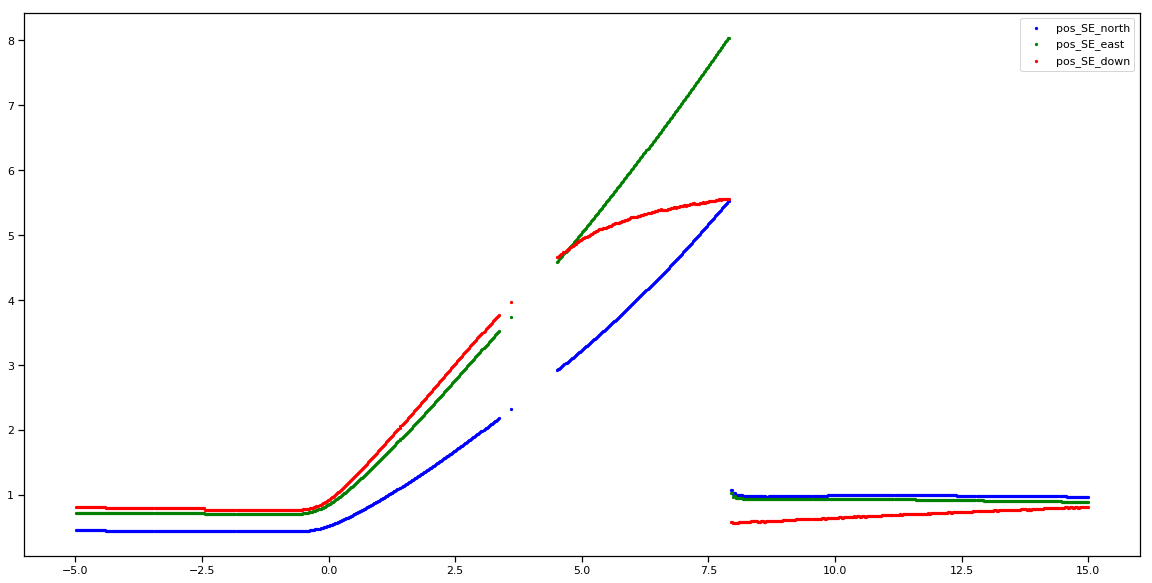

In [425]:

fig = plt.figure(figsize=(20,10))
ax_SE = fig.add_subplot(111)

ax_SE.scatter(df_test['sec_launch'], df_test['pos_SE_north'], s=5, c='b', label='pos_SE_north')
ax_SE.scatter(df_test['sec_launch'], df_test['pos_SE_east'], s=5, c='g', label='pos_SE_east')
ax_SE.scatter(df_test['sec_launch'], df_test['pos_SE_down'], s=5, c='r', label='pos_SE_down')
plt.legend(loc='upper right');
plt.show()

In [599]:
df_test.loc[(df_test['sec_launch'] > 3) & (df_test['sec_launch'] < 5)]

,sec_launch,pos_ref_north,pos_ref_east,pos_ref_down,vel_zip_north,vel_zip_east,vel_zip_down,acc_zip_foward,acc_zip_right,acc_zip_down,...,orientation_euler_pitch,orientation_euler_yaw,angular_zip_forward,angular_zip_right,angular_zip_down,pos_SE_north,pos_SE_east,pos_SE_down,resultant_vel,resultant_acc
401,3.01901,-86.874930,43.790257,-25.098475,-25.561240,10.864850,-6.663051,1.764570,0.492921,-10.083714,...,0.248011,2.704584,0.021423,-0.002095,-0.002429,1.978422,3.223885,3.478207,105.187211,10.248803
402,3.03900,-87.385540,44.007490,-25.231812,-25.540464,10.875608,-6.677309,1.882905,0.028639,-10.382420,...,0.247838,2.704800,0.063080,-0.009637,0.009638,1.990174,3.241598,3.497267,105.136836,10.551815
403,3.05899,-87.898200,44.225956,-25.339067,-25.524801,10.879673,-6.681165,1.893292,0.412204,-10.211074,...,0.247651,2.705014,0.043615,-0.005462,0.009861,2.001928,3.259330,3.514032,105.097594,10.393291
404,3.07899,-88.409860,44.444206,-25.451944,-25.511131,10.885850,-6.686421,2.027722,0.344871,-10.167144,...,0.247549,2.705105,0.047642,-0.001820,0.004201,2.013699,3.277066,3.530802,105.038463,10.373110
405,3.09898,-88.919510,44.661797,-25.585617,-25.494580,10.890536,-6.687612,1.778554,0.300994,-9.704369,...,0.247512,2.704937,0.044113,-0.001123,-0.008268,2.025521,3.294819,3.549869,104.996500,9.870594
406,3.11897,-89.430260,44.880222,-25.704990,-25.478231,10.905342,-6.683367,1.956509,-0.169444,-9.636960,...,0.247553,2.704706,0.021096,0.005529,-0.010837,2.037342,3.312589,3.566499,104.947364,9.835021
407,3.13897,-89.939960,45.098490,-25.830553,-25.466152,10.909233,-6.675082,1.858456,0.384832,-9.305632,...,0.247613,2.704574,0.068910,0.004920,-0.006004,2.049180,3.330364,3.583134,104.894746,9.497197
408,3.15896,-90.448690,45.316620,-25.964071,-25.448061,10.921177,-6.683308,1.947096,-0.056490,-10.055632,...,0.247765,2.704391,0.115929,0.008302,-0.008200,2.061069,3.348156,3.602207,104.861853,10.242564
409,3.17896,-90.959490,45.536100,-26.071411,-25.429749,10.934797,-6.687288,1.972527,-0.146330,-10.229709,...,0.248069,2.704057,0.055999,0.021043,-0.014535,2.072958,3.365965,3.618695,104.817187,10.419176
410,3.19895,-91.469890,45.755955,-26.175598,-25.405560,10.957469,-6.701250,2.032062,-0.645359,-10.818969,...,0.248756,2.703520,-0.162491,0.041543,-0.022657,2.084867,3.383778,3.635188,104.773551,11.027051


<a id = "flights_para"></a>

### Manipulate Summary Data and Prepare for Parallel Coordinates Plot

#### Make a copy of the previously adjusted summary dataframe, and drop some columns that will not be used in the following analysis

In [580]:
df_summary_para = df_summary_adj.copy()
df_summary_para.drop(['battery_serial_number','body_serial_number','launch_timestamp','commit','preflight_voltage','wing_serial_number'],axis=1, inplace=True)
df_summary_para




,flight_id,air_temperature,launch_airspeed,launch_groundspeed,rel_humidity,static_pressure,wind_direction,wind_magnitude,sec_100_vel,flight_altitude,ave_stable_posSE,data_size,flight_cat
0,16951,20.550000,32.453445,30.164656,74.150000,80662.081736,-49.434555,1.949338,0.49984,73.583416,0.642203,1001,V_ground > V_air (along)
1,16952,20.500000,32.141209,30.535246,71.175044,80708.065314,-4.408768,0.917357,0.49981,74.781635,0.631236,1001,V_ground > V_air (along)
2,16954,24.475019,34.701878,29.872613,66.374982,80774.270438,-23.458781,3.788383,0.49984,73.317892,0.428894,1001,V_ground > V_air (along)
3,16955,27.300000,34.368999,29.877624,59.000000,80805.138793,-46.747881,3.921605,0.49984,71.149138,0.828855,999,V_ground > V_air (along)
4,16957,26.950000,32.898979,30.027183,63.900000,80768.969307,-29.293360,2.975881,0.49986,72.592707,0.021564,1001,V_ground > V_air (along)
5,16959,28.574951,33.258007,30.178811,65.074951,80621.201026,-68.360838,2.750346,0.49987,72.050814,0.800692,1001,V_ground > V_air (along)
6,16960,27.550000,33.937340,30.063187,61.250000,80599.898970,-27.822443,1.556340,0.49984,72.769355,0.067870,1001,V_ground > V_air (along)
7,16961,28.250000,33.598980,29.969515,53.500000,80552.491259,7.094333,2.378607,0.49899,66.743170,0.494138,1001,V_ground > V_air (along)
8,16962,28.600000,31.639851,30.263741,60.374982,80445.017877,-46.053006,1.161924,0.49984,72.023445,0.996911,999,V_ground > V_air (along)
9,16965,32.250000,32.744957,30.354775,49.600000,80379.646583,-17.594640,2.742027,0.49878,72.433961,0.631561,1001,V_ground > V_air (along)


#### Build Parallel Coordinates Plot for flights in general

* Specify the columns interested for analysis, and analyze them by spliting all the flights in to <b>two categories:</b> `V_ground > V_air (along)` and `V_ground < V_air (against)`, 'against' means the zip was launched and cruised against the wind direction

* Create subplots according to the columns for analysis

* Since we want to avoid the scaling problem when we try to use parallel coordinates plot to drive analysis, we then should get the value range for each columns selected from `df_summary_adj`, and then normalize them to a same scale to fit in the same plot for `df_summary_para`

* set limit on x axis for rows in each column

* Set the tick positions and labels on y axis for each plot, where the tick positions are based on normalised data, and labels are based on original data from `df_summary_adj`

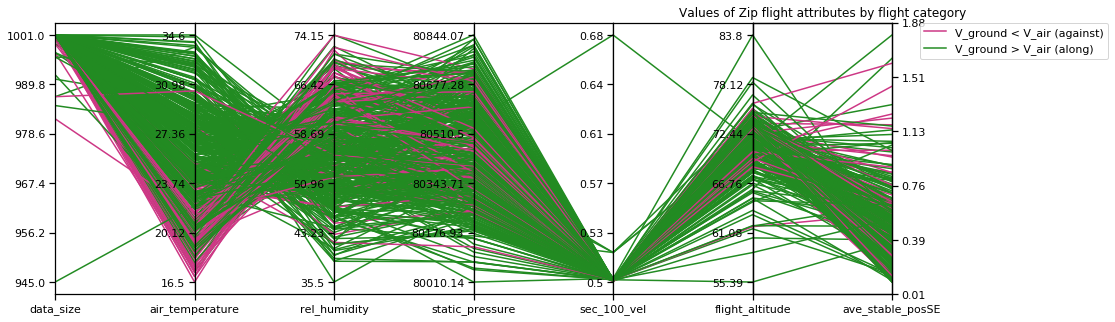

<Figure size 1800x1440 with 0 Axes>

In [590]:

cols = ['data_size', 'air_temperature', 'rel_humidity', 'static_pressure', 'sec_100_vel','flight_altitude', 'ave_stable_posSE']
x = [i for i, _ in enumerate(cols)]
colours = ['#cd3785', '#228B22']

# create dict of categories: colours
colours = {df_summary_para['flight_cat'].astype('category').cat.categories[i]: colours[i] for i, _ in enumerate(df_summary_para['flight_cat'].astype('category').cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df_summary_adj[col].min(), df_summary_adj[col].max(), np.ptp(df_summary_adj[col])]
    df_summary_para[col] = np.true_divide(df_summary_para[col] - df_summary_para[col].min(), np.ptp(df_summary_para[col]))

# Plot each row
for i, ax in enumerate(axes):
    for idx in df_summary_para.index:
        flight_category = df_summary_para.loc[idx, 'flight_cat']
        
        ax.plot(x, df_summary_para.loc[idx, cols], colours[flight_category])
    ax.set_xlim([x[i], x[i+1]])
    
# Set function to specify ticks for each column in each subplot  
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df_summary_para[cols[dim]].min()
    norm_range = np.ptp(df_summary_para[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df_summary_para['flight_cat'].astype('category').cat.categories],
    df_summary_para['flight_cat'].astype('category').cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("Values of Zip flight attributes by flight category")
plt.figure(figsize=(20,15))
plt.show()

#### Based on previous visualization , we can obtain and consider the two flights as <font size="5">outliers</font> where: ####

1. it took the Zip exceptionally longer time (`0.68` sec) to accelerate and reach 100 km/hr while Zips in other flights took around `0.5` sec

2. there are unusually less amount of records in one of the dataframes such that it only has `945` entries of data, which would result in inaccurate analysis

Obtain those outliers flights from dataframe, and we can opt to omit them by dropping them

In [597]:
df_outliers = df_summary_adj.loc[(round(df_summary_adj['sec_100_vel'],2) == 0.68) | (df_summary_adj['data_size'] == 945)]
df_outliers

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number,sec_100_vel,flight_altitude,ave_stable_posSE,data_size,flight_cat
220,17355,20.62501,15SPJJJ10012034,577348835962032159,5c504d9a16,30.375414,30.068931,2018-09-21 07:25:11 CAT,31.970465,64.050019,80551.333330,25.568192,0.596642,15SPJJJ09008034,0.67979,71.484334,0.457940,992,V_ground > V_air (along)
382,17654,22.10000,15SPJJJ10050016,577348835878129703,1ecbc27833,32.803715,30.188347,2018-10-03 07:49:20 CAT,32.049328,55.750000,80704.756325,-32.994696,2.537824,15SPJJJ09040032,0.49984,70.723759,0.870257,945,V_ground > V_air (along)


### <font size="5">Insights</font>  based on the Parallel Coordinates Plot

1. When the Zip is launched and flying <b>against</b> the wind direction, it tends to be in an environment with lower air temperature and rather higher relative humidity 


2. In both flight categories, the Zips accelerated to 100 km/hr in around 0.5 second regardless of launching against or along the wind direction.
    - There are various reasons for that, such as not large enough number of flights in this project, environmental factors were not fluctuated enough or the Zips were not cruising at a high enough altitude in this 15 second period of time
    
    
3. Observing `ave_stable_poseSE` in the parallel coordinates plot, the Zips in flights that were launched and cruised <b>against</b> the wind direction tends to have relatively higher average position standard errors indicating the position uncertainty. It means if a Zip is launched and cruised against the wind direction, even though its level of position uncertainty stablize, its position would most likely fluctuate. It is logical because when a Zip is flying against the wind direction, the wind and its magnitude would somewhat increase the positional uncertainty of the Zip


4. Combining the previous analysis about flights outliers in terms of `flight_altitude` and this parallel coordinates plot above, we can notice that after that 15 seconds after launch, the Zip tends to be able to climb up to around `66.76` and `75.28`. In which, the Zips in flights where they were launched and cruised against the wind direction might climb to a relatively lower altitude in the range  `66.76` to `75.28`. It makes sense, but we might need more data to draw that conclusion


---

<a id = "summary"></a>

## Summary

According to the data analysis above, there exist some points worth noticing for the engineerings/operations:
1. Assuming column names in all these data are generated by the measuring machine/instrument, it would be better for readibility and future operation and analysis if thoes column names can be adjusted tailoring to the description of attributes. For example, 'velocity_ned_mps[0]' can be changed to 'vel_zip_north' meaning the velocity of the Zip in the north direction

2. Assuming it is not by designed for the engineerings/operations, more careful and detail calibration for equipment measuring flight attribute should be done, such as 'acceleration of the zip' because even though there might be manual or environmental factors making the Zip shake a little bit, there should not be acceleration magnitude as large as 9 or 10 m/s^2. This behavior will result in troublesome conversion and calculation for engineering, and misleading for operation

For every flight, the Zip greatly accelerated about 0.6~0.7 second, in which it reached 100 km/hr in around 0.5 second, and then reach maximum speed about 110km/hr. Afterwards, the Zip would cruise in roughly normal velocity, and finally climbed up to around 70 meter of altitude.

Among all flights in this project, there are following discoveries and insights:
1. There are missing data in one of the column 'preflight_voltage' in the summary dataset, as well as some time lapsed of 'seconds_since_launch' in some of the flight datasets, meaning that there are times where 'seconds_since_launch' jumped from like '3.59883' to '4.51854'. It certainly results in missing rows of data and outliers

2. There are 368 flights where Zips were launched and cruised somewhat along the wind direction, and 79 of them are against the wind direction. And with the benefit of wind, Zip can save more energy such as battery life

And if we analyze flights data in two categories: along and against, we can have some further insights:

3. When the Zip is launched and flying against the wind direction, it tends to be in an environment with lower air temperature and rather higher relative humidity

4. In both flight categories, the Zips accelerated to 100 km/hr in around 0.5 second regardless of launching against or along the wind direction. There are various reasons for that, such as not large enough number of flights in this project, environmental factors were not fluctuated enough or the Zips were not cruising at a high enough altitude in this 15 second period of time

5. Observing ave_stable_poseSE in the parallel coordinates plot, the Zips in flights that were launched and cruised against the wind direction tends to have relatively higher average position standard errors indicating the position uncertainty. It means if a Zip is launched and cruised against the wind direction, even though its level of position uncertainty stablize, its position would most likely fluctuate. It is logical because when a Zip is flying against the wind direction, the wind and its magnitude would somewhat increase the positional uncertainty of the Zip

6. Combining the previous analysis about flights outliers in terms of flight_altitude and this parallel coordinates plot above, we can notice that after that 15 seconds after launch, the Zip tends to be able to climb up to around 66.76 and 75.28. In which, the Zips in flights where they were launched and cruised against the wind direction might climb to a relatively lower altitude in the range  66.76 to 75.28. It makes sense, but we might need more data to draw that conclusion


Side notes:

1. The colder air temperature can shorten the flight time of Zip, it slows the chemical reaction with the LiPo batteries and lowering the battery capacity.

2. Aerodynamically speaking, air temperature also affects density altitude. And humidity doesn't have as much of an effect on density altitude as temperature and pressure do. Also since air mass flowing over Zip's wing allows the Zip to generate more lift, the performance of the Zip's engine, propellor and wing during flight and especially the launch would decrease if the density altidude decreased.

Therefore, the effect of weather factors should be more significant if there was larger amount of dataset and longer period of flight time after launch
